# Performance Analysis of Distributed ADMM

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("text", usetex=True) #if tou have Latex set this to true and matplotlib will render labels in latex
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more ni

In [14]:
cores = (2**(np.linspace(4,6,3))).astype(int)
threads= (2**(np.linspace(0,4, 5))).astype(int)

In [69]:
order = ['I/O', "Precompute", 'ADMM']

In [15]:
results = np.zeros(cores.shape+threads.shape+(3,) )
iterations = np.zeros(cores.shape+threads.shape)

In [24]:
for c,core in enumerate(cores):
    for t,thread in enumerate(threads):
        with open(f'perf_results/output_{core}_{thread}.txt') as f:
            lines = f.readlines()[-6:-2]
        for i,line in enumerate(lines):
            if i<3:
                results[c, t, i] = float(line.strip().split()[-1])
            else:
                iterations[c, t] = int(line.strip().split()[-1])

In [154]:
total_time = results.sum(-1)
compute_time = results[...,1:].sum(-1)
total_cpu = np.outer(cores,threads)

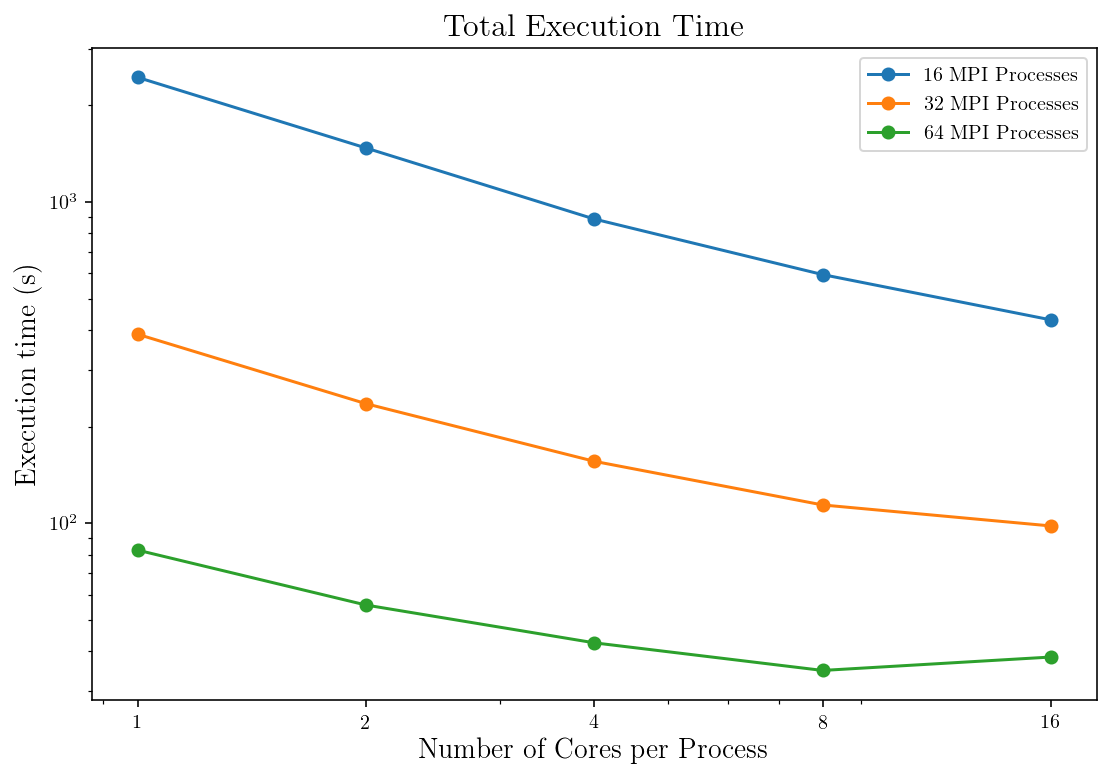

In [152]:
for i,res in enumerate(total_time):
    plt.plot(threads,res,"-o", label=f"{cores[i]} MPI Processes")
plt.loglog()
plt.xticks(threads, threads)
plt.xlabel("Number of Cores per Process", fontsize=14)
plt.ylabel("Execution time (s)", fontsize=14)
plt.title("Total Execution Time", fontsize=16)
plt.legend()
plt.savefig('figures/total_time.png',dpi=200)
plt.show()

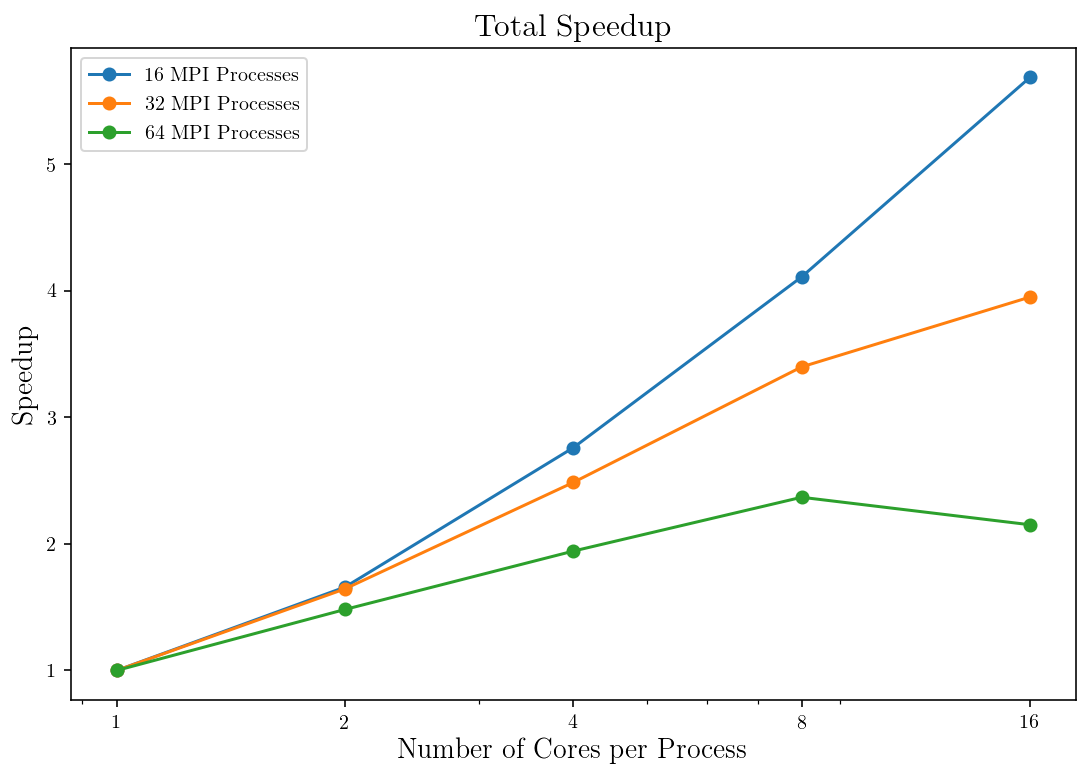

In [162]:
for i,res in enumerate(total_time):
    plt.plot(threads,res[0]/res,"-o", label=f"{cores[i]} MPI Processes")
plt.semilogx()
plt.xticks(threads, threads)
plt.xlabel("Number of Cores per Process", fontsize=14)
plt.ylabel("Speedup", fontsize=14)
plt.title("Total Speedup", fontsize=16)
plt.legend()
plt.savefig('figures/total_speedup.png',dpi=200)
plt.show()

In [85]:
x = np.arange(threads.shape[0])

In [149]:
def get_top_center_rect(rect):
    pos = [0,0]
    pos[0] = rect.get_xy()[0]+rect.get_width()/2 - .05
    pos[1] = rect.get_xy()[1]+rect.get_height()+8
    return tuple(pos)

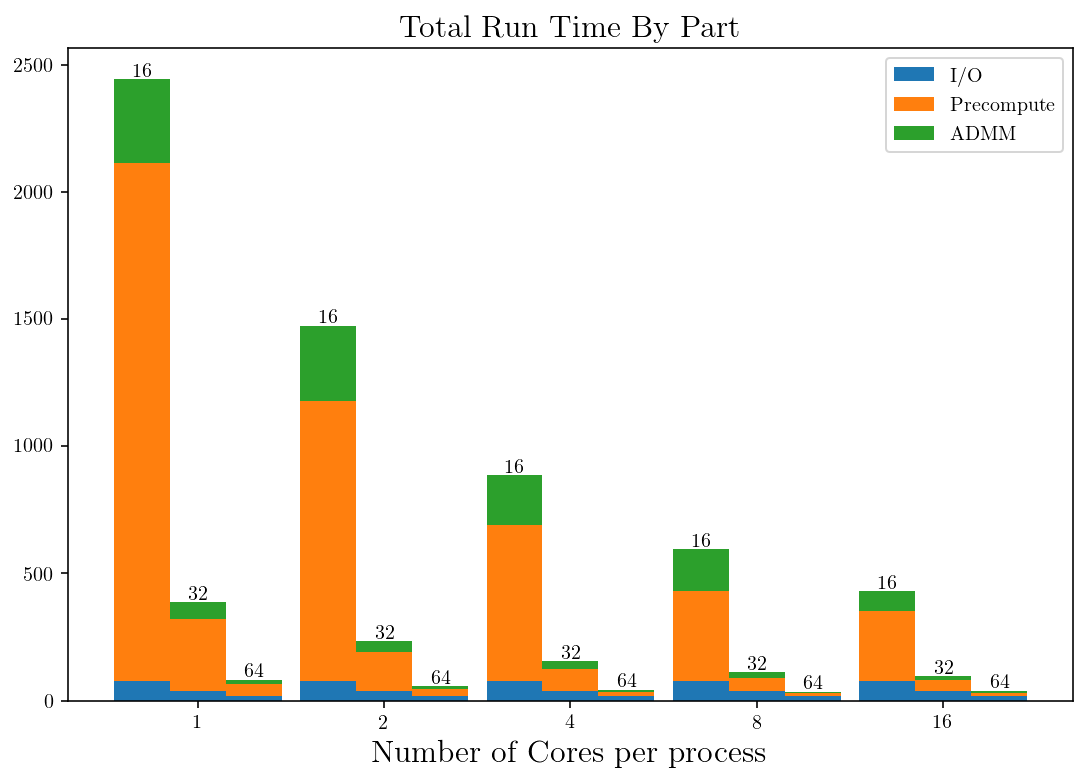

In [158]:
for c,core in enumerate(np.flip(cores)):
    b = plt.bar(x+0.3*(1-c), results[2-c,:,0], width=0.3, color=f"C{0}")
    if c==0: b.set_label(order[0])
    for i in range(1,3):
        b = plt.bar(x+0.3*(1-c),results[2-c,:,i],width=0.3, 
                    bottom=np.sum(results[2-c,:,:i],axis=-1),
                    color=f"C{i}")
        if c==0: b.set_label(order[i])
    for j in range(threads.shape[0]):
        plt.annotate(f'{core}', xy=get_top_center_rect(b.patches[j]))
#plt.semilogy()
plt.xticks(x, threads)
plt.title("Total Run Time By Part", fontsize=16)
plt.xlabel("Number of Cores per process", fontsize=16)
plt.legend()
plt.savefig("figures/time_by_part.png",dpi=200)
plt.show()

In [163]:
fsr = results[...,1]/(results[...,2])

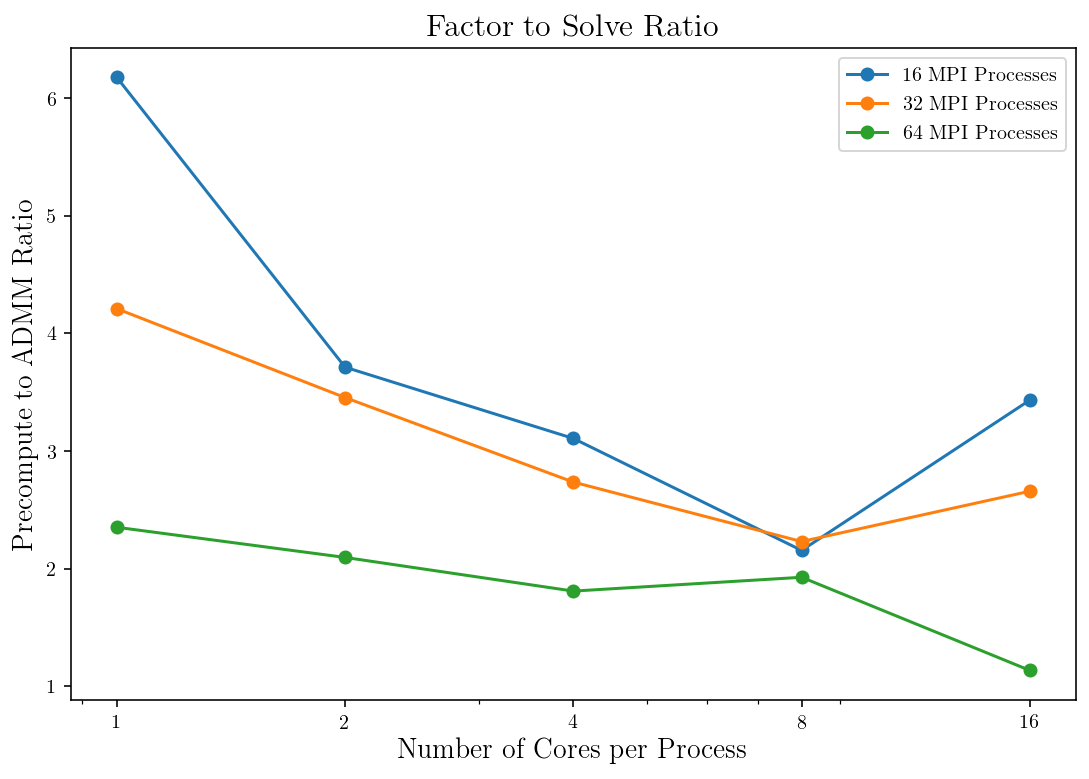

In [169]:
for i,res in enumerate(fsr):
    plt.plot(threads,res,"-o", label=f"{cores[i]} MPI Processes")
plt.semilogx()
plt.xticks(threads, threads)
plt.xlabel("Number of Cores per Process", fontsize=14)
plt.ylabel("Precompute to ADMM Ratio", fontsize=14)
plt.title("Factor to Solve Ratio", fontsize=16)
plt.legend()
plt.savefig('figures/factor_solve_ratio.png',dpi=200)
plt.show()